In [1]:
import nb_utils

Moving cwd to /store/CIA/js2164/repos/diffusion/score_sde_pytorch


/store/CIA/js2164/conda_envs/score_sde/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from lightning_modules.VAE import VAE

# Celeb

In [40]:
model = VAE.load_from_checkpoint('logs/VAE/celeba/kl_0.01/latent_dim_512_v1/checkpoints/epoch=74--val_loss=9.575.ckpt')
model = model.eval()

Lightning automatically upgraded your loaded checkpoint from v1.5.1 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file logs/VAE/celeba/kl_0.01/latent_dim_512_v1/checkpoints/epoch=74--val_loss=9.575.ckpt`


In [5]:
from lightning_data_modules.SRFLOWDataset import UnpairedDataModule

In [11]:
from configs.utils import read_config
config = read_config('configs/VAE/celebA_no_conv.py')
data_module = UnpairedDataModule(config)    
data_module.setup()
train_dataloader = data_module.train_dataloader()
val_dataloader = data_module.val_dataloader()
test_dataloader = data_module.test_dataloader()

User: js2164

Machine: holly-a.damtp.cam.ac.uk



In [12]:
batch = next(iter(test_dataloader))[:32]

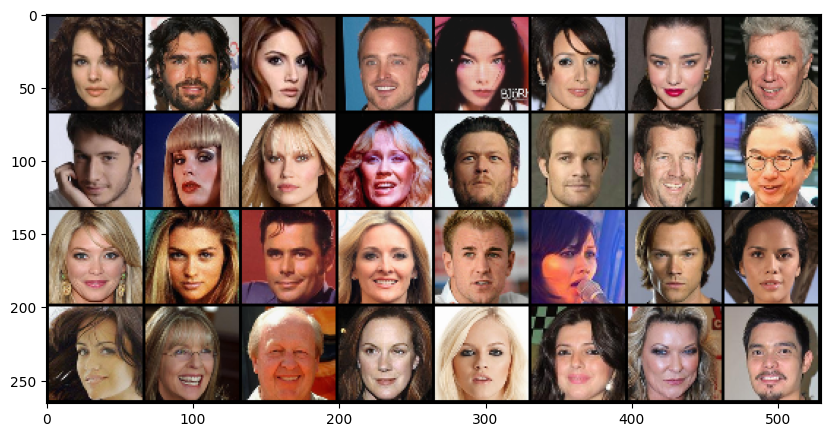

In [13]:
import torchvision
from matplotlib import pyplot as plt
grid_images = torchvision.utils.make_grid(batch.cpu(), normalize=True, scale_each=True)
plt.figure(figsize=(10,10))
plt.imshow(grid_images.permute(1,2,0))
plt.show()

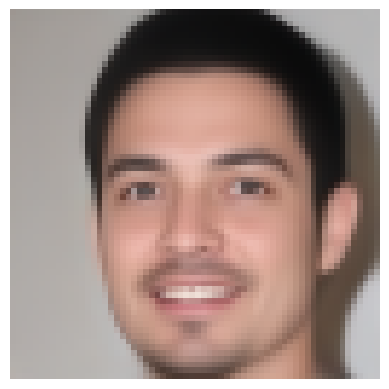

In [39]:
for i in range(batch.shape[0]):
    z, _ = model.encode(batch[i][None,...])
    reconstruction, _ = model.decode(z)
    reconstruction = reconstruction[0].detach().permute(1,2,0)
    plt.imshow(reconstruction)
    plt.axis('off')
    plt.savefig(f'figures/VAE_reconstructions/celebA/{i+1}.png', bbox_inches='tight', pad_inches=0)


# Cifar

In [41]:
model = VAE.load_from_checkpoint('logs/VAE/cifar10/kl_0.01/latent_dim_384/checkpoints/epoch=298--val_loss=6.913.ckpt')
model = model.eval()

Lightning automatically upgraded your loaded checkpoint from v1.5.1 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file logs/VAE/cifar10/kl_0.01/latent_dim_384/checkpoints/epoch=298--val_loss=6.913.ckpt`


In [43]:
from lightning_data_modules.ImageDatasets import Cifar10DataModule
from configs.utils import read_config
config = read_config('config configs/VAE/cifar.py')
data_module = Cifar10DataModule(config)
data_module.setup()
train_dataloader = data_module.train_dataloader()
val_dataloader = data_module.val_dataloader()
test_dataloader = data_module.test_dataloader()

User: js2164

Machine: holly-a.damtp.cam.ac.uk

Files already downloaded and verified
Files already downloaded and verified


In [44]:
batch = next(iter(test_dataloader))[:32]

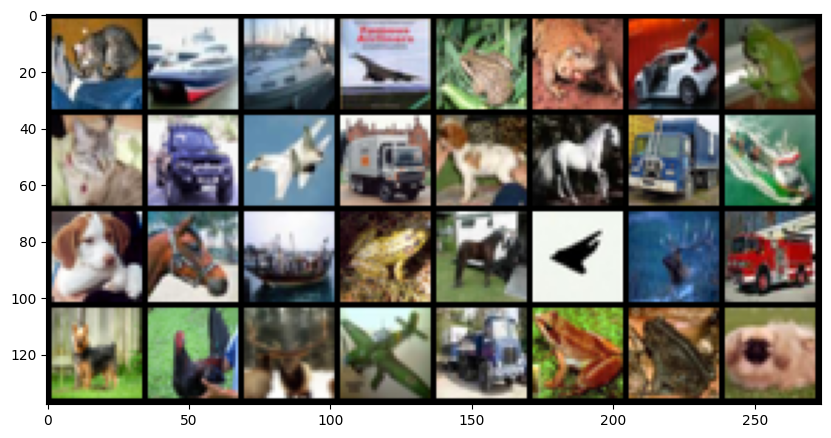

In [45]:
import torchvision
from matplotlib import pyplot as plt
grid_images = torchvision.utils.make_grid(batch.cpu(), normalize=True, scale_each=True)
plt.figure(figsize=(10,10))
plt.imshow(grid_images.permute(1,2,0))
plt.show()

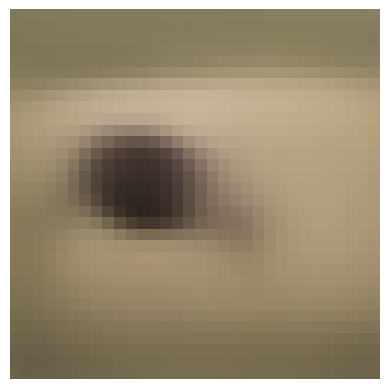

In [47]:
for i in range(batch.shape[0]):
    z, _ = model.encode(batch[i][None,...])
    reconstruction, _ = model.decode(z)
    reconstruction = reconstruction[0].detach().permute(1,2,0)
    plt.imshow(reconstruction)
    plt.axis('off')
    plt.savefig(f'figures/VAE_reconstructions/cifar/{i+1}.png', bbox_inches='tight', pad_inches=0)
